In [58]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

# Visualizaciones
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from scipy.stats import pearsonr

pd.set_option('display.float_format', '{:.2f}'.format)

In [97]:
df = pd.read_csv('../df_definitivo.csv', index_col=0)

In [98]:
df.columns

Index(['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'assigned_room_type',
       'booking_changes', 'agent', 'days_in_waiting_list', 'customer_type',
       'average daily rate', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status',
       'reservation_status_date', 'lead_time_months', 'ltm'],
      dtype='object')

In [60]:
df

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,assigned_room_type,booking_changes,agent,days_in_waiting_list,customer_type,average daily rate,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,lead_time_months,ltm
hotel,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Resort Hotel,False,342.00,2015.00,July,27.00,1.00,0.00,0.00,2.00,NaN,0.00,BB,PRT,Direct,False,NaN,0.00,C,3.00,NaN,0.00,Transient,0.00,0.00,0.00,Check-Out,2015-07-01 00:00:00,> 11 meses,11
Resort Hotel,False,737.00,NaN,July,27.00,1.00,0.00,0.00,2.00,NaN,0.00,BB,NaN,Direct,False,0.00,0.00,C,4.00,NaN,0.00,Transient,0.00,0.00,0.00,Check-Out,2015-07-01 00:00:00,> 12 meses,12
Resort Hotel,False,7.00,2015.00,July,27.00,1.00,0.00,1.00,1.00,0.00,0.00,BB,GBR,Direct,False,0.00,0.00,C,0.00,NaN,0.00,Transient,75.00,0.00,0.00,Check-Out,2015-07-02 00:00:00,< 1 mes,0
Resort Hotel,False,13.00,NaN,July,27.00,1.00,0.00,1.00,1.00,NaN,0.00,BB,GBR,Corporate,False,0.00,0.00,A,0.00,304.00,0.00,Transient,75.00,0.00,0.00,Check-Out,2015-07-02 00:00:00,< 1 mes,0
Resort Hotel,False,14.00,NaN,July,NaN,1.00,0.00,2.00,2.00,NaN,0.00,BB,NaN,TA/TO,False,0.00,0.00,A,0.00,240.00,0.00,Transient,98.00,0.00,1.00,Check-Out,2015-07-03 00:00:00,< 1 mes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
City Hotel,False,23.00,2017.00,August,35.00,30.00,2.00,5.00,2.00,0.00,0.00,BB,NaN,TA/TO,False,0.00,0.00,A,0.00,394.00,0.00,NaN,96.14,0.00,0.00,Check-Out,2017-06-09 00:00:00,< 1 mes,0
City Hotel,False,102.00,NaN,August,35.00,31.00,2.00,5.00,3.00,NaN,0.00,BB,FRA,TA/TO,False,NaN,0.00,E,0.00,9.00,0.00,Transient,225.43,0.00,2.00,Check-Out,2017-07-09 00:00:00,> 3 meses,3
City Hotel,False,34.00,2017.00,August,35.00,31.00,2.00,5.00,2.00,NaN,0.00,BB,NaN,TA/TO,False,0.00,0.00,D,0.00,9.00,0.00,Transient,157.71,0.00,4.00,Check-Out,2017-07-09 00:00:00,> 1 mes,1


In [61]:
df1 = df.iloc[:, 0:8]

# Imprimir los tipos de datos de las columnas seleccionadas
print(df1.dtypes)

is_canceled                     bool
lead_time                    float64
arrival_date_year            float64
arrival_date_month            object
arrival_date_week_number     float64
arrival_date_day_of_month    float64
stays_in_weekend_nights      float64
stays_in_week_nights         float64
dtype: object


In [62]:
df1.isnull().sum()/df1.shape[0]*100

is_canceled                  0.00
lead_time                    0.00
arrival_date_year           45.75
arrival_date_month           0.00
arrival_date_week_number    15.54
arrival_date_day_of_month    0.10
stays_in_weekend_nights      0.00
stays_in_week_nights         0.00
dtype: float64

In [63]:
def exploracion(df1):
    forma = df1.shape
    print(f"La forma es {forma}")
    print("_______________")
    columnas = df1.columns
    print(f"Las columnas son {columnas}")
    print("_______________")
    nulos = df1.isna().sum().reset_index()
    print(f"Los nulos son:")
    display(nulos)
    print("_______________")
    duplicados = df1.duplicated().sum()
    print(f"Hay {duplicados} duplicados")
    print("_______________")
    tipo_dato = df1.dtypes.reset_index()
    print(f"Los datos son de tipo:")
    display(tipo_dato)

In [64]:
exploracion(df1)

La forma es (118005, 8)
_______________
Las columnas son Index(['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights'],
      dtype='object')
_______________
Los nulos son:


,index,0
0,is_canceled,0
1,lead_time,0
2,arrival_date_year,53982
3,arrival_date_month,0
4,arrival_date_week_number,18338
5,arrival_date_day_of_month,119
6,stays_in_weekend_nights,0
7,stays_in_week_nights,0


_______________
Hay 36644 duplicados
_______________
Los datos son de tipo:


,index,0
0,is_canceled,bool
1,lead_time,float64
2,arrival_date_year,float64
3,arrival_date_month,object
4,arrival_date_week_number,float64
5,arrival_date_day_of_month,float64
6,stays_in_weekend_nights,float64
7,stays_in_week_nights,float64


In [65]:
# Eliminar duplicados
df1 = df1.drop_duplicates()

# Muestra los duplicados que hay
duplicados_filas = df1[df1.duplicated()]
if not duplicados_filas.empty:
    print("Filas duplicadas:")
    display(duplicados_filas)
    print("_______________")

In [66]:
# Función para ver los valores unicos de las columnas
def unique_values(data):
    for column in data.columns:
        unique_values = data[column].unique()
        print(f"Valores únicos en la columna '{column}': {unique_values}")
        print("-----------------------------------------")
print(unique_values(df1))

Valores únicos en la columna 'is_canceled': [False  True]
-----------------------------------------
Valores únicos en la columna 'lead_time': [342. 737.   7.  13.  14.   0.   9.  85.  75.  23.  35.  68.  18.  37.
  12.  72. 127.  78.  48.  60.  77.  99. 118.  95.  96.  69.  45.  40.
  15.  36.  43.  70.  16. 107.  47. 113.  90.  50.  93.  76.   3.   1.
  10.   5.  17.  51.  71.  63.  62. 101.   2.  81. 368. 364. 324.  79.
  21. 109. 102.   4.  98.  92.  26.  73. 115.  86.  52.  29.  30.  33.
  32.   8. 100.  44.  80.  97.  64.  39.  34.  27.  82.  94. 110. 111.
  84.  66. 104.  28. 258. 112.  65.  67.  55.  88.  54. 292.  83. 105.
 280. 394.  24. 103. 366. 249.  22.  91.  11. 108. 106.  31.  87.  41.
 304. 117.  59.  53.  58. 116.  42. 321.  38.  56.  49. 317.   6.  57.
  19.  25. 315. 123.  46.  89.  61. 312. 299. 130.  74. 298. 119.  20.
 286. 136. 129. 124. 327. 131. 460. 140. 114. 139. 122. 137. 126. 120.
 128. 135. 150. 143. 151. 132. 125. 157. 147. 138. 156. 164. 346. 159.
 160. 

In [67]:
def limpieza(df1):
    # Mapear los números de mes a nombres de mes
    meses = {
        '1': 'January',
        '2': 'February',
        '3': 'March',
    }
    df1['arrival_date_month'] = df1['arrival_date_month'].astype(str)
    df1['arrival_date_month'] = df1['arrival_date_month'].replace(meses)

    # Convertir todas las columnas del DataFrame a tipo entero excepto 'hotel', 'is_canceled' y 'arrival_date_month'
    df1.fillna(-1, inplace=True)  # Rellenar NaN con -1
    exclude_columns = ['hotel', 'is_canceled', 'arrival_date_month']
    columns_to_convert = [col for col in df1.columns if col not in exclude_columns]
    df1[columns_to_convert] = df1[columns_to_convert].astype(int)

    return df1

# Llamar a la función de limpieza
df1 = limpieza(df1)

In [68]:
df1.sample(20)

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights
hotel,,,,,,,,
Resort Hotel,True,82,-1,August,32,3,2,5
City Hotel,False,3,2015,September,36,3,0,2
Resort Hotel,True,190,-1,July,30,24,3,8
City Hotel,False,5,-1,October,43,19,1,1
Resort Hotel,False,31,2016,October,44,28,0,2
Resort Hotel,True,12,2016,July,31,24,1,0
Resort Hotel,True,34,-1,October,-1,30,2,5
City Hotel,False,195,2017,August,-1,17,4,8
City Hotel,False,10,-1,June,24,12,1,0


In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
pd.set_option('display.max_columns', None) 

In [100]:
df=pd.read_csv('../df_definitivo.csv', index_col=0)

In [101]:
df

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,assigned_room_type,booking_changes,agent,days_in_waiting_list,customer_type,average daily rate,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,lead_time_months,ltm
hotel,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Resort Hotel,False,342.00,2015.00,July,27.00,1.00,0.00,0.00,2.00,NaN,0.00,BB,PRT,Direct,False,NaN,0.00,C,3.00,NaN,0.00,Transient,0.00,0.00,0.00,Check-Out,2015-07-01 00:00:00,> 11 meses,11
Resort Hotel,False,737.00,NaN,July,27.00,1.00,0.00,0.00,2.00,NaN,0.00,BB,NaN,Direct,False,0.00,0.00,C,4.00,NaN,0.00,Transient,0.00,0.00,0.00,Check-Out,2015-07-01 00:00:00,> 12 meses,12
Resort Hotel,False,7.00,2015.00,July,27.00,1.00,0.00,1.00,1.00,0.00,0.00,BB,GBR,Direct,False,0.00,0.00,C,0.00,NaN,0.00,Transient,75.00,0.00,0.00,Check-Out,2015-07-02 00:00:00,< 1 mes,0
Resort Hotel,False,13.00,NaN,July,27.00,1.00,0.00,1.00,1.00,NaN,0.00,BB,GBR,Corporate,False,0.00,0.00,A,0.00,304.00,0.00,Transient,75.00,0.00,0.00,Check-Out,2015-07-02 00:00:00,< 1 mes,0
Resort Hotel,False,14.00,NaN,July,NaN,1.00,0.00,2.00,2.00,NaN,0.00,BB,NaN,TA/TO,False,0.00,0.00,A,0.00,240.00,0.00,Transient,98.00,0.00,1.00,Check-Out,2015-07-03 00:00:00,< 1 mes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
City Hotel,False,23.00,2017.00,August,35.00,30.00,2.00,5.00,2.00,0.00,0.00,BB,NaN,TA/TO,False,0.00,0.00,A,0.00,394.00,0.00,NaN,96.14,0.00,0.00,Check-Out,2017-06-09 00:00:00,< 1 mes,0
City Hotel,False,102.00,NaN,August,35.00,31.00,2.00,5.00,3.00,NaN,0.00,BB,FRA,TA/TO,False,NaN,0.00,E,0.00,9.00,0.00,Transient,225.43,0.00,2.00,Check-Out,2017-07-09 00:00:00,> 3 meses,3
City Hotel,False,34.00,2017.00,August,35.00,31.00,2.00,5.00,2.00,NaN,0.00,BB,NaN,TA/TO,False,0.00,0.00,D,0.00,9.00,0.00,Transient,157.71,0.00,4.00,Check-Out,2017-07-09 00:00:00,> 1 mes,1


## Observaciones

LAURA:
- lead_time y booking_changes 
- lead_time y reservation_status
- lead_time, booking_changes  y reservation_status


In [102]:
final = pd.read_csv('../df_definitivo.csv', index_col=0)

In [103]:
final.columns

Index(['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'assigned_room_type',
       'booking_changes', 'agent', 'days_in_waiting_list', 'customer_type',
       'average daily rate', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status',
       'reservation_status_date', 'lead_time_months', 'ltm'],
      dtype='object')

In [104]:
def lead_time(valor):
    if valor > 365:
        return '> 1 año'
    elif valor > 330:
        return '> 11 meses'
    elif valor > 300:
        return '> 10 meses'
    elif valor > 270:
        return '> 9 meses'
    elif valor > 240:
        return '> 8 meses'
    elif valor > 210:
        return '> 7 meses'
    elif valor > 180:
        return '> 6 meses'
    elif valor > 150:
        return '> 5 meses'
    elif valor > 120:
        return '> 4 meses'
    elif valor > 90:
        return '> 3 meses'
    elif valor > 60:
        return '> 2 meses'
    elif valor > 30:
        return '> 1 mes'
    else:
        return '< 1 mes'


In [105]:
final['lead_time_months'] = final['lead_time'].apply(lead_time)

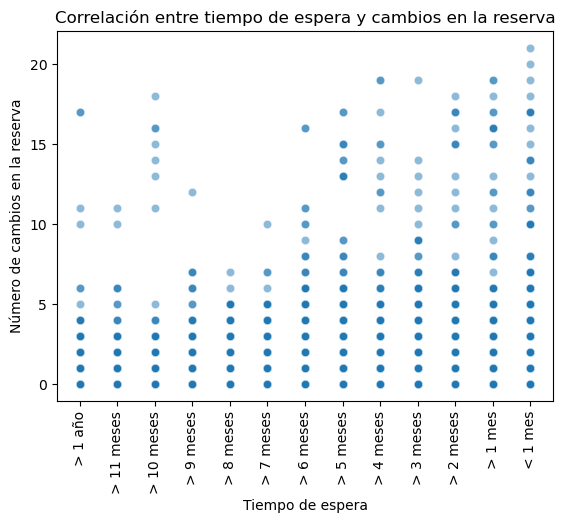

In [106]:
# Definir el orden de las categorías
order = ['> 1 año', '> 11 meses', '> 10 meses', '> 9 meses', '> 8 meses', '> 7 meses', '> 6 meses', '> 5 meses', '> 4 meses', '> 3 meses', '> 2 meses', '> 1 mes', '< 1 mes']

# Filtrar filas con valores no nulos en ambas columnas y en el orden especificado
filtered_final = final.dropna(subset=['lead_time_months', 'booking_changes'])
filtered_final['lead_time_months'] = pd.Categorical(filtered_final['lead_time_months'], categories=order, ordered=True)

# Crear el diagrama de dispersión
sns.scatterplot(data=filtered_final, x='lead_time_months', y='booking_changes', alpha=0.5)

# Configuración adicional
plt.xlabel('Tiempo de espera')
plt.ylabel('Número de cambios en la reserva')
plt.title('Correlación entre tiempo de espera y cambios en la reserva')

# Rotar las etiquetas del eje x
plt.xticks(rotation=90);


Teoria
- H0: No existe diferencia significativa
- H1: Hay diferencia significativa
    - p_value > 0.05 Aceptamos H0 --> No hay diferencia
    - p_value < 0.05 Rechazamos la hipótesis nula --> Hay diferencias

In [107]:
# Eliminar filas con valores NaN en ambas columnas
final_cleaned = final.dropna(subset=['lead_time', 'booking_changes'])

# Calcular la correlación de Pearson
correlation, p_value = pearsonr(final_cleaned['lead_time'], final_cleaned['booking_changes'])

print("Coeficiente de correlación de Pearson:", correlation)
print("Valor p:", p_value)

Coeficiente de correlación de Pearson: 0.003298900111051971
Valor p: 0.2571199924771227


El coeficiente de correlación de Pearson entre 'lead_time' y 'booking_changes' es 0.0083, lo que indica una correlación muy débil entre estas dos variables. Sin embargo, el valor p es 0.0047, que es menor que 0.05, lo que sugiere que hay diferencias significativas,no podemos dar por hecho que esta correlación sea cierta.
Por lo que rechazamos la hipotesis Nula.

### lead_time y reservation_status

In [108]:
final["reservation_status"].unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

In [109]:
final[["lead_time","reservation_status"]]

,lead_time,reservation_status
hotel,,
Resort Hotel,342.00,Check-Out
Resort Hotel,737.00,Check-Out
Resort Hotel,7.00,Check-Out
Resort Hotel,13.00,Check-Out
Resort Hotel,14.00,Check-Out
...,...,...
City Hotel,23.00,Check-Out
City Hotel,102.00,Check-Out
City Hotel,34.00,Check-Out


In [110]:
lead_time_max_min = final["lead_time"].agg(["max", "min"])
lead_time_max_min

max   737.00
min     0.00
Name: lead_time, dtype: float64

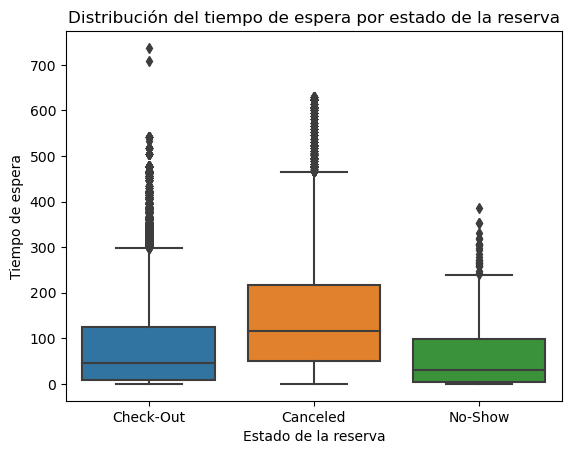

In [111]:
# Crear el gráfico de caja
sns.boxplot(x='reservation_status', y='lead_time', data=final)

# Configuración adicional
plt.xlabel('Estado de la reserva')
plt.ylabel('Tiempo de espera')
plt.title('Distribución del tiempo de espera por estado de la reserva')

# Mostrar el gráfico
plt.show()

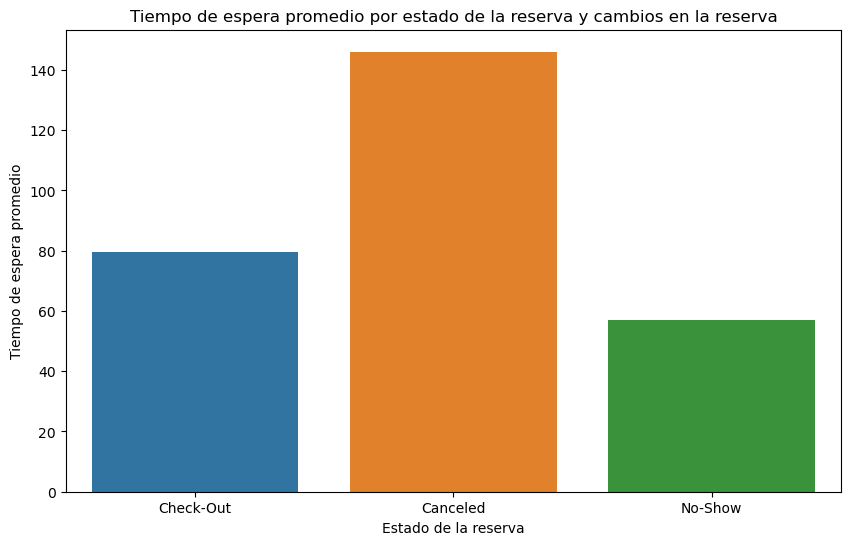

In [112]:
plt.figure(figsize=(10, 6))
sns.barplot(data=final, x='reservation_status', y='lead_time', ci=None, estimator=np.mean)

# Configuración adicional
plt.xlabel('Estado de la reserva')
plt.ylabel('Tiempo de espera promedio')
plt.title('Tiempo de espera promedio por estado de la reserva y cambios en la reserva')

# Mostrar el gráfico
plt.show()

In [113]:
import scipy.stats as stats

In [114]:

# Eliminar filas con NaN en 'lead_time'
final_cleaned = final.dropna(subset=['reservation_status'])

# Calcular la correlación de Spearman
correlation_spearman, p_value = stats.spearmanr(final_cleaned['lead_time'], final_cleaned['reservation_status'])

print("Correlación de Spearman entre lead_time y reservation_status:", correlation_spearman)
print("Valor p:", p_value)


Correlación de Spearman entre lead_time y reservation_status: -0.32492284316787917
Valor p: 0.0


La correlación de Spearman entre 'lead_time' y 'reservation_status' es de aproximadamente -0.318.

La correlación de Spearman es una medida de la relación monotónica entre dos variables. Una correlación negativa indica que hay una relación inversa entre las dos variables: a medida que una variable aumenta, la otra tiende a disminuir, y viceversa.

En este caso, una correlación de -0.318 sugiere que hay una relación moderadamente negativa entre 'lead_time' y 'reservation_status'. Específicamente, esto significa que a medida que aumenta el tiempo que pasa desde la reserva hasta el check-in ('lead_time'), es menos probable que el estado de la reserva sea 'check-out'??? o 'no-show', y más probable que sea 'canceled', y viceversa.

El valor p asociado con la correlación es 0.0, lo que indica que la probabilidad de obtener una correlación de Spearman tan extrema o más extrema por pura casualidad es prácticamente nula. Por lo tanto, podemos concluir que la correlación entre 'lead_time' y 'reservation_status' es estadísticamente significativa.

In [115]:
final.columns

Index(['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'assigned_room_type',
       'booking_changes', 'agent', 'days_in_waiting_list', 'customer_type',
       'average daily rate', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status',
       'reservation_status_date', 'lead_time_months', 'ltm'],
      dtype='object')

### Is canceled y previous cancelation

In [116]:
columnas_seleccionadas = final[['is_canceled', 'previous_cancellations']]
columnas_seleccionadas

,is_canceled,previous_cancellations
hotel,,
Resort Hotel,False,NaN
Resort Hotel,False,0.00
Resort Hotel,False,0.00
Resort Hotel,False,0.00
Resort Hotel,False,0.00
...,...,...
City Hotel,False,0.00
City Hotel,False,NaN
City Hotel,False,0.00


In [117]:
final["is_canceled"].unique()

array([False,  True])

In [118]:
final["previous_cancellations"].unique()

array([nan,  0., 14., 10., 19., 13., 17.,  1.,  2.,  3., 26., 25.,  4.,
       24., 12., 16.,  5., 11., 15., 18., 21.,  6.])

In [119]:
# Eliminar filas con NaN en 'previous_cancellations'
final_clean = final.dropna(subset=['previous_cancellations', 'is_canceled'])

# Calcular el coeficiente de correlación de Pearson y su p-value
correlation, p_value = pearsonr(final_clean['previous_cancellations'], final_clean['is_canceled'])

# Mostrar el coeficiente de correlación de Pearson y el p-value
print("Coeficiente de correlación de Pearson:", correlation)
print("Valor p:", p_value)

Coeficiente de correlación de Pearson: 0.09560665832967155
Valor p: 4.430637704261168e-152


 El valor p muy pequeño sugiere que esta correlación no es estadísticamente significativa. Por lo tanto, podemos concluir que las cancelaciones anteriores y si una reserva de hotel es cancelada no están relacionadas linealmente.

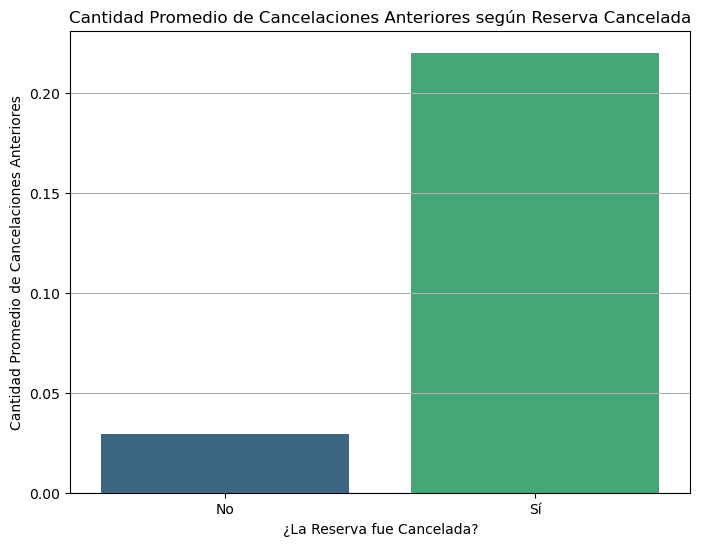

In [120]:

# Eliminar filas con NaN en 'previous_cancellations' y 'is_canceled'
final_clean = final.dropna(subset=['previous_cancellations', 'is_canceled'])

# Agrupar por 'is_canceled' y calcular la media de 'previous_cancellations'
grouped_data = final_clean.groupby('is_canceled')['previous_cancellations'].mean().reset_index()

# Crear la gráfica de barras
plt.figure(figsize=(8, 6))
sns.barplot(x='is_canceled', y='previous_cancellations', data=grouped_data, palette='viridis')
plt.title('Cantidad Promedio de Cancelaciones Anteriores según Reserva Cancelada')
plt.xlabel('¿La Reserva fue Cancelada?')
plt.ylabel('Cantidad Promedio de Cancelaciones Anteriores')
plt.xticks([0, 1], ['No', 'Sí'])  # Etiqueta los valores del eje x como 'No' y 'Sí'
plt.grid(True, axis='y')  # Agregar líneas de cuadrícula horizontal
plt.show()





In [121]:
df.columns

Index(['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'assigned_room_type',
       'booking_changes', 'agent', 'days_in_waiting_list', 'customer_type',
       'average daily rate', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status',
       'reservation_status_date', 'lead_time_months', 'ltm'],
      dtype='object')

In [122]:
from scipy import stats
import pandas as pd

# Suponiendo que tienes un DataFrame llamado df y deseas calcular la correlación de Spearman entre las columnas 'agent' y 'is_canceled',
# excluyendo los valores NaN.

# Eliminar filas con valores NaN en las columnas 'agent' y 'is_canceled'
df_cleaned = df.dropna(subset=['market_segment', 'is_canceled'])

# Calcular la correlación de Spearman
correlation_spearman, p_value = stats.spearmanr(df_cleaned['market_segment'], df_cleaned['is_canceled'])

# Convertir el resultado a una cadena sin ceros
correlation_spearman_str = "{:.2f}".format(correlation_spearman).rstrip('0').rstrip('.')

# Mostrar la correlación de Spearman y el valor p sin ceros
print("Correlación de Spearman entre agent y is_canceled (sin NaN):", correlation_spearman_str)
print("Valor p:", p_value)


KeyError: ['market_segment']

In [ ]:
df["market_segment"].unique()

array([nan, 'Corporate', 'Online TA', 'Direct', 'Offline TA/TO', 'Groups',
       'Complementary', 'Undefined', 'Aviation'], dtype=object)

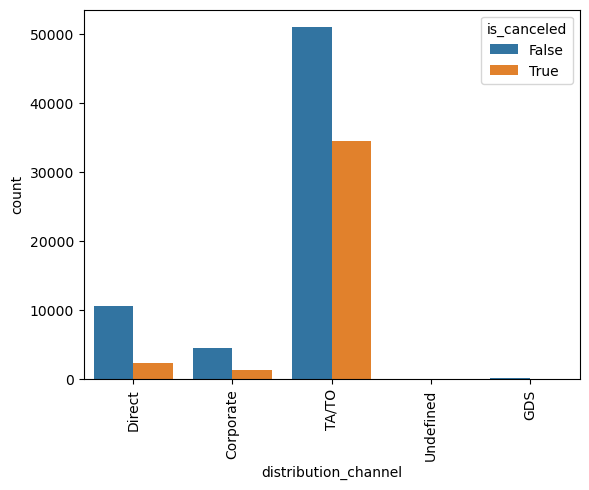

In [131]:
sns.countplot(x="distribution_channel", hue= "is_canceled", data=df)
plt.xticks(rotation=90);

In [124]:
df["average daily rate"].agg(["min","max"])

min     -6.38
max   5400.00
Name: average daily rate, dtype: float64

In [128]:
df[df["average daily rate"]<=0]["average daily rate"]

hotel
Resort Hotel   0.00
Resort Hotel   0.00
Resort Hotel   0.00
Resort Hotel   0.00
Resort Hotel   0.00
               ... 
City Hotel     0.00
City Hotel     0.00
City Hotel     0.00
City Hotel     0.00
City Hotel     0.00
Name: average daily rate, Length: 1958, dtype: float64